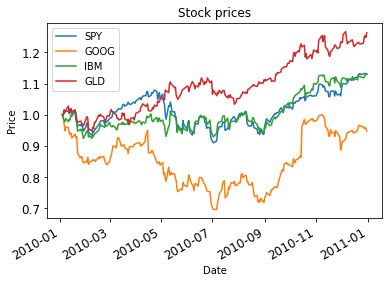

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    #ax = df.plot()
    #plt.show()
    
    #Impresion de columnas seleccionadas con slicing
    #plot_data(df.loc[start_index:end_index, columns])
    
    #Impresion de datos normalizados. Se divide el dataFrame por la primer fila, entonces todos arrancan en 1
    plot_data(normalize_data(df))

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join("{}.csv".format(str(symbol)))

def normalize_data(df):
    return(df / df.iloc[0,:])

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
    
    #df = df.iloc[0,:]
    
    #df.plot()

if __name__ == "__main__":
    test_run()